In [8]:
# import libaries
import tensorflow
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Embedding, Dropout, SimpleRNN, LSTM, GRU

In [9]:
# loading the datsets
vocab_size = 10000
max_len= 250

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# adding pad sequences for equal input ndim
x_train= pad_sequences(x_train, maxlen= max_len)
x_test= pad_sequences(x_test, maxlen= max_len)

In [10]:
# define model
model= Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim = 128, input_length= max_len))
model.add(SimpleRNN(units=128, activation='tanh', return_sequences= False))
model.add(Dense(units=1, activation='sigmoid'))

# compile the model
model.compile(optimizer="adam", loss= "binary_crossentropy", metrics=["accuracy"])

# train the model
history= model.fit(x_train,y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


196/196 ━━━━━━━━━━━━━━━━━━━━ 88s 436ms/step - accuracy: 0.5481 - loss: 0.6829 - val_accuracy: 0.7072 - val_loss: 0.5559
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 86s 439ms/step - accuracy: 0.7730 - loss: 0.4754 - val_accuracy: 0.7093 - val_loss: 0.5550
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 145s 452ms/step - accuracy: 0.7275 - loss: 0.5278 - val_accuracy: 0.7470 - val_loss: 0.5221
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 161s 552ms/step - accuracy: 0.8305 - loss: 0.3821 - val_accuracy: 0.6707 - val_loss: 0.5961
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 118s 430ms/step - accuracy: 0.8115 - loss: 0.4221 - val_accuracy: 0.7632 - val_loss: 0.4972


In [11]:
# evaluate the model
loss, accuracy= model.evaluate(x_test, y_test)
print("model accuracy :", accuracy, "model loss :", loss)

782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.7620 - loss: 0.5023
model accuracy : 0.7631999850273132 model loss : 0.49720197916030884


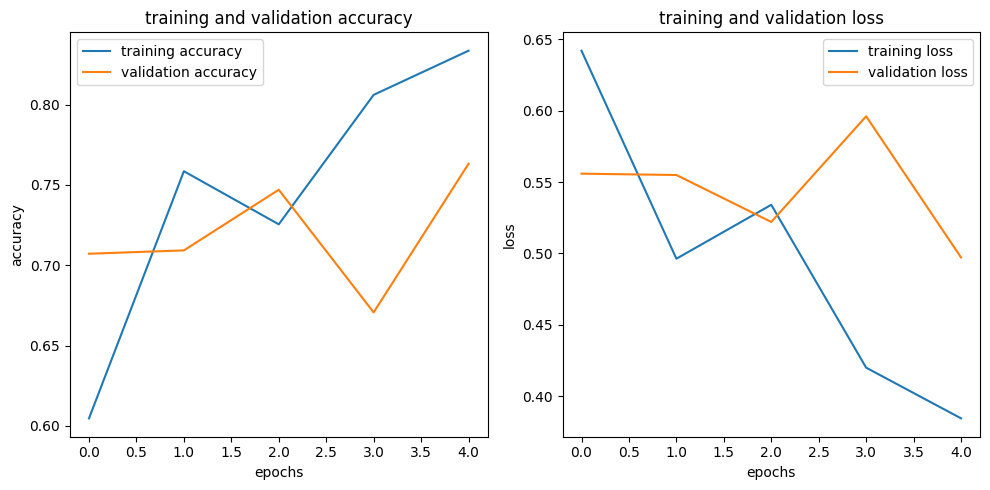

In [12]:
# visulize the accuracy and loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# visulize the accuracy
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label= "training accuracy")
plt.plot(history.history["val_accuracy"], label= "validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.title("training and validation accuracy")

# visulize the loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label= "training loss")
plt.plot(history.history["val_loss"], label = "validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.title("training and validation loss")

plt.tight_layout()
plt.show()

LSTM (long short term memorary)

In [13]:
# build the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
model.add(LSTM(units=64, activation='tanh', return_sequences=False))
model.add(Dense(units=1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


196/196 ━━━━━━━━━━━━━━━━━━━━ 134s 673ms/step - accuracy: 0.7006 - loss: 0.5421 - val_accuracy: 0.8560 - val_loss: 0.3627
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 141s 669ms/step - accuracy: 0.8930 - loss: 0.2681 - val_accuracy: 0.8752 - val_loss: 0.3024
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 143s 672ms/step - accuracy: 0.9340 - loss: 0.1834 - val_accuracy: 0.8668 - val_loss: 0.3170
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 119s 606ms/step - accuracy: 0.9487 - loss: 0.1462 - val_accuracy: 0.8714 - val_loss: 0.3451
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 154s 665ms/step - accuracy: 0.9641 - loss: 0.1052 - val_accuracy: 0.8599 - val_loss: 0.4217


In [14]:
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Model accuracy:", accuracy, "Model loss:", loss)

782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.8606 - loss: 0.4214
Model accuracy: 0.8598799705505371 Model loss: 0.4217265248298645


GRU (GATED RECURRENT UNIT)

In [15]:
# BUILD the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
model.add(GRU(units=64, activation='tanh', return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


196/196 ━━━━━━━━━━━━━━━━━━━━ 143s 716ms/step - accuracy: 0.6526 - loss: 0.5878 - val_accuracy: 0.8615 - val_loss: 0.3321
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 139s 704ms/step - accuracy: 0.9023 - loss: 0.2506 - val_accuracy: 0.8690 - val_loss: 0.3131
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 138s 705ms/step - accuracy: 0.9287 - loss: 0.2020 - val_accuracy: 0.8664 - val_loss: 0.3189
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 137s 701ms/step - accuracy: 0.9455 - loss: 0.1531 - val_accuracy: 0.8687 - val_loss: 0.3545
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 144s 713ms/step - accuracy: 0.9654 - loss: 0.1016 - val_accuracy: 0.8642 - val_loss: 0.4329


In [16]:
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Model accuracy:", accuracy, "Model loss:", loss)

782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.8628 - loss: 0.4398
Model accuracy: 0.8641999959945679 Model loss: 0.43288734555244446


In [19]:
import os
import nbformat

# Get current notebook name (Colab workaround)
from google.colab import drive
drive.mount('/content/drive')  # Optional if you're working from Drive

# Replace with your actual notebook path
notebook_path = '/content/drive/MyDrive/Colab Notebooks/imdb sentiment classification using RNN,LSTM,GRU.ipynb'  # Update this
cleaned_path = '/content/imdb_sentiment_classification_using_RNN_LSTM_GRU.ipynb'

# Load and clean notebook
with open(notebook_path, 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, as_version=4)

if 'widgets' in nb['metadata']:
    print("Removing metadata.widgets...")
    del nb['metadata']['widgets']

# Save cleaned notebook
with open(cleaned_path, 'w', encoding='utf-8') as f:
    nbformat.write(nb, f)

print(f"Cleaned notebook saved to: {cleaned_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


NameError: name 'imdb_sentiment_classification_using_RNN_LSTM_GRU' is not defined